                                 PYTHON DATA ANALYSIS ASSIGNMENT

 Analysis of this data is to look at the demography and a change in various structures of the common plant species  under grazed and ungrazed conditions with climate factors from the year 1997 to 2010. 

            Import packages

In [2]:
import pandas as pd

In [3]:
import sqlite3

In [4]:
%matplotlib inline

            Load Data from bash and read in pandas.

In [5]:
!retriever install sqlite mapped-plant-quads-co

=> Installing Shortgrass steppe mapped plants quads - Chu et al. 2013
Creating table mapped_plant_quads_co_species_name_changes...
Progress: 28 / 28 rows inserted into mapped_plant_quads_co_species_name_changes totaling 28:

Creating table mapped_plant_quads_co_quad_stocking_rate...
Progress: 85 / 85 rows inserted into mapped_plant_quads_co_quad_stocking_rate totaling 85:

Creating table mapped_plant_quads_co_allrecords_cover...
Progress: 400 / 105155 rows inserted into mapped_plant_quads_co_allrecords_cover totaling 105155:Progress: 800 / 105155 rows inserted into mapped_plant_quads_co_allrecords_cover totaling 105155:

In [6]:
connection = sqlite3.connect("sqlite.db")

In [9]:
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'",
                               connection)
table_names

,name
0,mapped_plant_quads_co_species_name_changes
1,mapped_plant_quads_co_quad_stocking_rate
2,mapped_plant_quads_co_allrecords_cover
3,mapped_plant_quads_co_quad_inventory
4,mapped_plant_quads_co_quad_info
5,mapped_plant_quads_co_species_list
6,mapped_plant_quads_co_allrecords_density
7,mapped_plant_quads_co_daily_climate


In [10]:
cover = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_allrecords_cover",
                           connection)
cover.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [11]:
spp = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_species_list",
                           connection)
spp.head()

,species,density,cover,growthform,longevity
0,Achillea millefolium,2.0,NaN,forb,P
1,Agropyron smithii,4649.0,NaN,grass,P
2,Allium spp.,18.0,NaN,forb,P
3,Allium textile,73.0,NaN,forb,P
4,Ambrosia psilostachya,2.0,NaN,forb,P


In [12]:
quad = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_quad_info",
                           connection)
quad.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_19,19,40.823798,-104.710306,1633,grazed,grazed
2,gzgz_24,24,40.822824,-104.729504,1650,grazed,grazed
3,gzgz_5a,5a,40.868138,-104.690792,1657,grazed,grazed
4,gzgz_5b,5b,40.867662,-104.680630,1661,grazed,grazed


In [13]:
climate = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_daily_climate",
                           connection)
climate.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,1997,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,1997,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,1997,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,1997,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


        1. A plot of the area covered by each species over all quadrats (y) for each year (x).

In [14]:
merged = pd.merge(left = cover, right = spp, how = 'left',
        left_on = 'species', right_on = 'species')
merged.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant


In [15]:
sp_plot = merged.groupby(['species','year'], 
                         as_index = False).area.sum()


sp_plot.head()

,species,year,area
0,Ant hill,1998,0.011008
1,Ant hill,1999,0.014806
2,Ant hill,2000,0.006458
3,Ant hill,2001,0.013366
4,Ant hill,2002,0.003034


In [16]:
sp_plot_wide = sp_plot.pivot(index = 'year', columns = 'species', 
                             values = 'area')

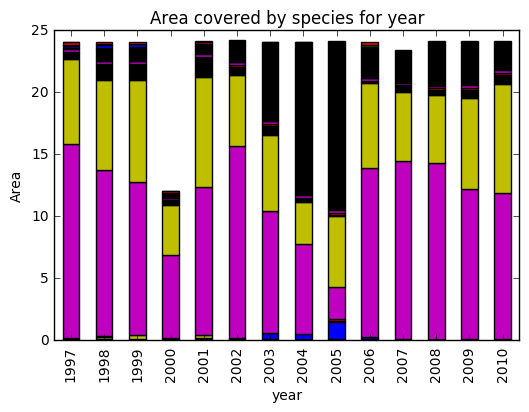

In [18]:
my_plot = sp_plot_wide.plot(kind = 'bar', stacked = True, legend = False, 
                  title = "Area covered by species for year")
my_plot.set_xlabel("year")
my_plot.set_ylabel("Area")

    Brief discussion of results

This graph shows the area covered by each species of plant for all quadrats both grazed and ungrazed
from 1997 to 2010.  From the graph, generally, species group with the mauve legend (Mushroom, corner plate and bare ground) occupied a wider surface area compared to the species forms. Those with blue legend covered less areas.across the years excluding year 2004 and 2005,
 The rest of the species however are seen to occupy a small surface
area across all years which may be due to the effect of climate or grazed by animals henc changes in the demography of the species (area covered)
are observed.

    2. A plot of the area covered by each growth-form over all quadrats (y) for each year (x)

In [16]:
GF_plot = merged.groupby(['growthform','year'], 
                         as_index = False).area.sum()
GF_plot.head()

,growthform,year,area
0,Crown,1998,0.883835
1,Crown,1999,1.001064
2,Crown,2000,0.287084
3,Crown,2001,0.503875
4,Crown,2002,1.647143


In [17]:
GF_plot_wide = GF_plot.pivot(index = 'year', columns = 'growthform', 
                             values = 'area')

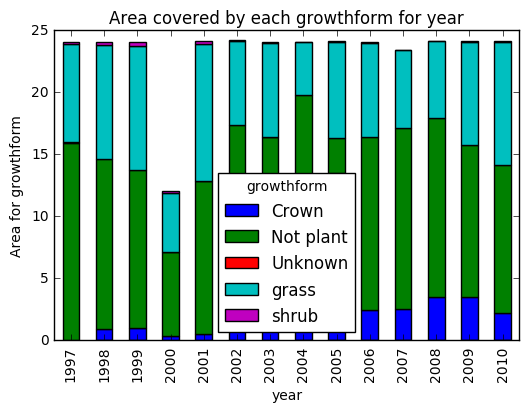

In [18]:
my_plota = GF_plot_wide.plot(kind = 'bar', stacked = True, legend = True, 
                  title = "Area covered by each growthform for year")
my_plota.set_xlabel("year")
my_plota.set_ylabel("Area for growthform")

        Brief discussion of results

This plot shows the growth form of all species of plant from 1997 t0 2010. It can be inferred from the plot that species  that are not plant  covered greater part of area across years.Grass covered larger areas than shrubs.seen that generally across the years, the growthform of most species were not plant, followed by grass, 
crown species and the least observed as shrub and unknown forms. the changes observed in the growthform of these common species 
may also be due to climatic conditions impacting the various growthforms or over grazed of most species in each year leading to 
the loss of most plant species.
